In [10]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("results.csv")



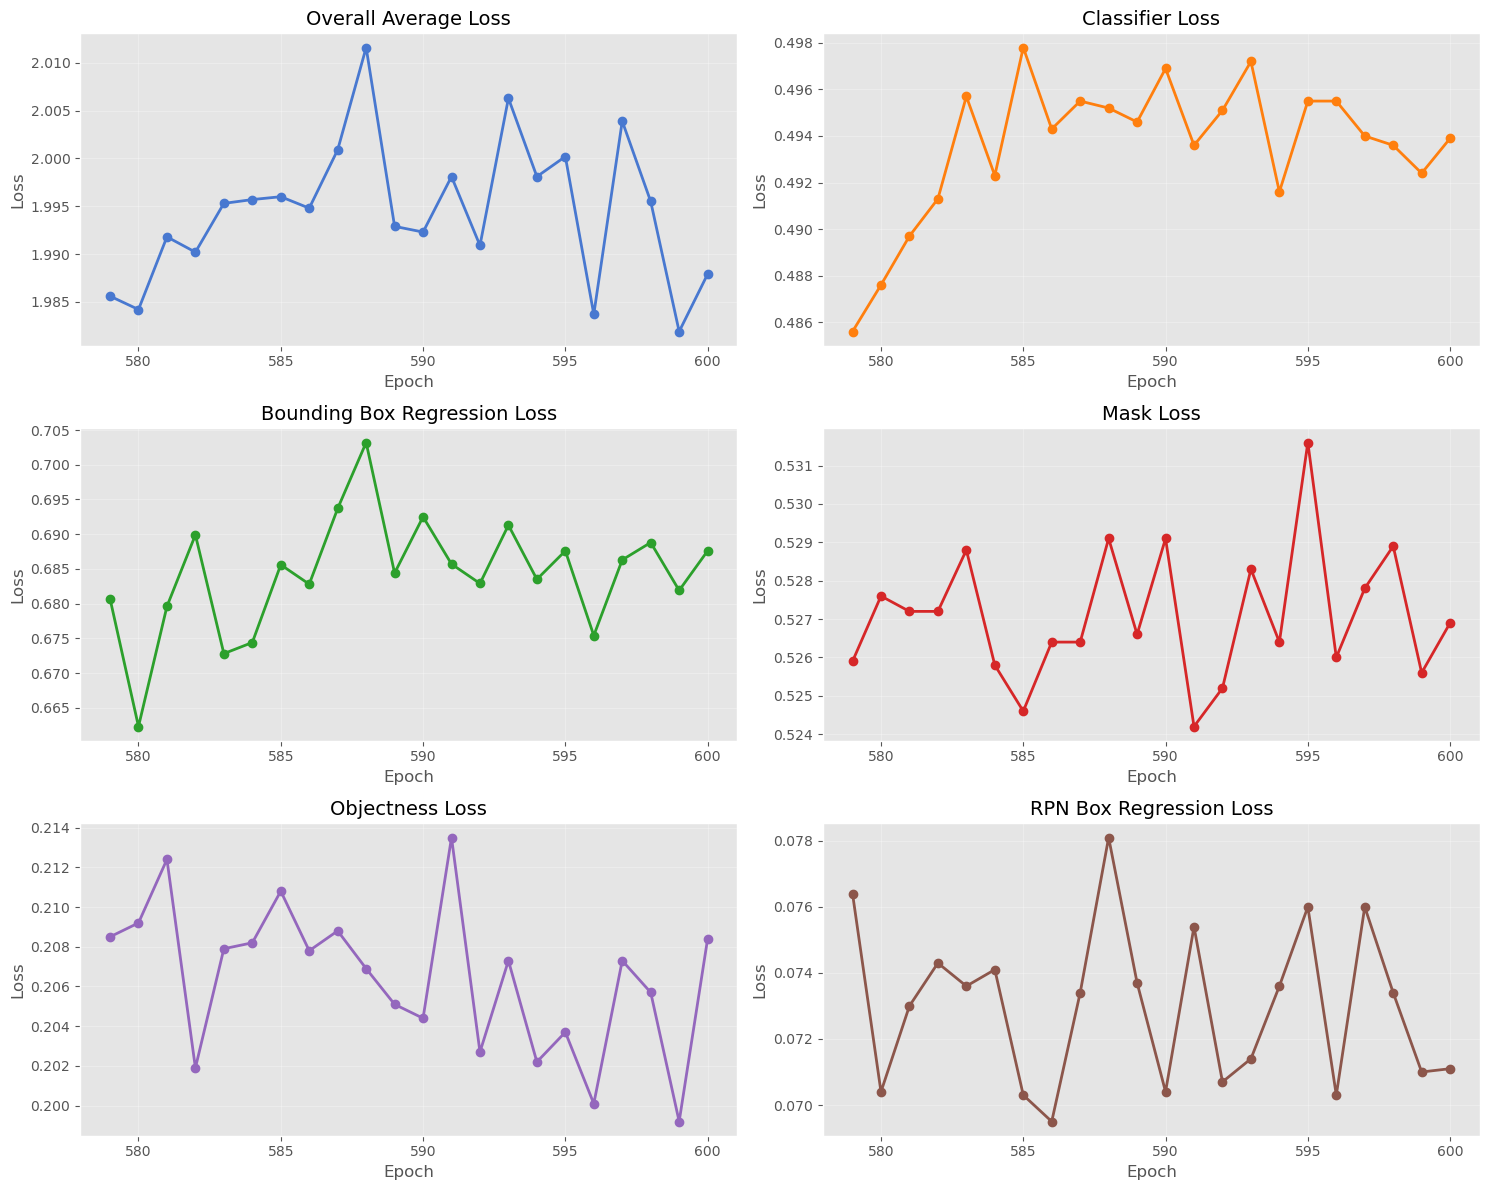

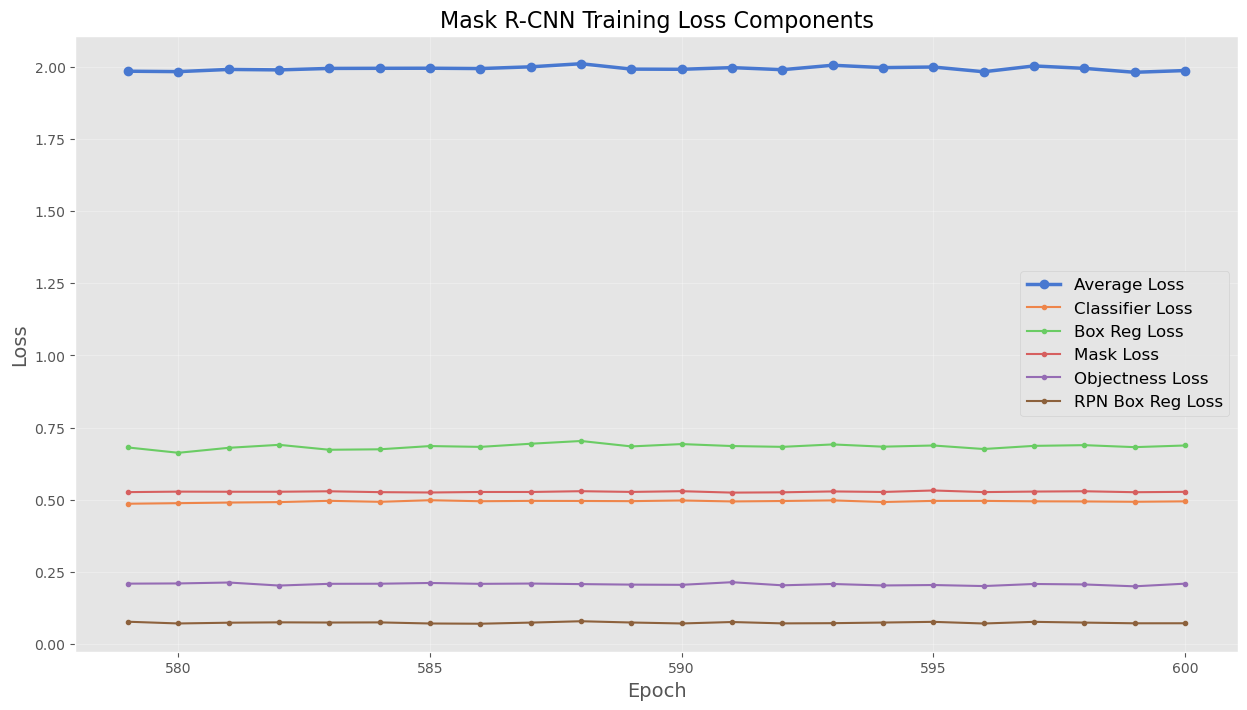

NameError: name 'np' is not defined

<Figure size 1500x800 with 0 Axes>

In [ ]:
import pandas as pd



# Set style
plt.style.use('ggplot')
sns.set_palette("muted")
plt.figure(figsize=(15, 12))

# 1. Plot the overall average loss
plt.subplot(3, 2, 1)
plt.plot(df['Epoch'], df['Avg_Loss'], marker='o', linewidth=2)
plt.title('Overall Average Loss', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True, alpha=0.3)

# 2. Plot Loss_Classifier
plt.subplot(3, 2, 2)
plt.plot(df['Epoch'], df['Loss_Classifier'], marker='o', color='#ff7f0e', linewidth=2)
plt.title('Classifier Loss', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True, alpha=0.3)

# 3. Plot Loss_Box_Reg
plt.subplot(3, 2, 3)
plt.plot(df['Epoch'], df['Loss_Box_Reg'], marker='o', color='#2ca02c', linewidth=2)
plt.title('Bounding Box Regression Loss', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True, alpha=0.3)

# 4. Plot Loss_Mask
plt.subplot(3, 2, 4)
plt.plot(df['Epoch'], df['Loss_Mask'], marker='o', color='#d62728', linewidth=2)
plt.title('Mask Loss', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True, alpha=0.3)

# 5. Plot Loss_Objectness
plt.subplot(3, 2, 5)
plt.plot(df['Epoch'], df['Loss_Objectness'], marker='o', color='#9467bd', linewidth=2)
plt.title('Objectness Loss', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True, alpha=0.3)

# 6. Plot Loss_RPN_Box_Reg
plt.subplot(3, 2, 6)
plt.plot(df['Epoch'], df['Loss_RPN_Box_Reg'], marker='o', color='#8c564b', linewidth=2)
plt.title('RPN Box Regression Loss', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True, alpha=0.3)

# Adjust layout and save
plt.tight_layout()
plt.savefig('mask_rcnn_loss_components.png', dpi=300)
plt.show()

# You can also create a combined plot with all components for comparison
plt.figure(figsize=(15, 8))
plt.plot(df['Epoch'], df['Avg_Loss'], marker='o', label='Average Loss', linewidth=2.5)
plt.plot(df['Epoch'], df['Loss_Classifier'], marker='.', label='Classifier Loss', linewidth=1.5)
plt.plot(df['Epoch'], df['Loss_Box_Reg'], marker='.', label='Box Reg Loss', linewidth=1.5)
plt.plot(df['Epoch'], df['Loss_Mask'], marker='.', label='Mask Loss', linewidth=1.5)
plt.plot(df['Epoch'], df['Loss_Objectness'], marker='.', label='Objectness Loss', linewidth=1.5)
plt.plot(df['Epoch'], df['Loss_RPN_Box_Reg'], marker='.', label='RPN Box Reg Loss', linewidth=1.5)

plt.title('Mask R-CNN Training Loss Components', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig('mask_rcnn_combined_loss.png', dpi=300)
plt.show()

# Additional: Plot the proportion of each loss component to total loss
components = ['Loss_Classifier', 'Loss_Box_Reg', 'Loss_Mask', 'Loss_Objectness', 'Loss_RPN_Box_Reg']
df_percentage = df[components].div(df[components].sum(axis=1), axis=0) * 100

plt.figure(figsize=(15, 8))
colors = sns.color_palette("muted", len(components))
bottom = np.zeros(len(df))

for i, col in enumerate(components):
    plt.bar(df['Epoch'], df_percentage[col], bottom=bottom, width=0.8, 
            label=col.replace('Loss_', ''), color=colors[i])
    bottom += df_percentage[col]

plt.title('Contribution of Each Loss Component (%)', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('mask_rcnn_loss_proportions.png', dpi=300)
plt.show()

# Also create a small multiple line chart to see trends in each component
import numpy as np
from matplotlib.ticker import FormatStrFormatter

# Get min/max values for each component to set y-axis limits
min_vals = df[components].min()
max_vals = df[components].max()
padding = (max_vals - min_vals) * 0.1  # Add 10% padding

fig, axes = plt.subplots(len(components), 1, figsize=(12, 15), sharex=True)
fig.suptitle('Trends in Individual Loss Components', fontsize=16, y=0.92)

for i, component in enumerate(components):
    axes[i].plot(df['Epoch'], df[component], 'o-', linewidth=2, color=colors[i])
    axes[i].set_title(component.replace('Loss_', '') + ' Loss', fontsize=12)
    axes[i].set_ylim(min_vals[component] - padding[component], max_vals[component] + padding[component])
    axes[i].grid(True, alpha=0.3)
    axes[i].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    
    # Highlight min value point
    min_idx = df[component].idxmin()
    axes[i].plot(df.loc[min_idx, 'Epoch'], df.loc[min_idx, component], 'o', 
                 color='red', markersize=8)
    axes[i].annotate(f'Min: {df.loc[min_idx, component]:.4f}', 
                    xy=(df.loc[min_idx, 'Epoch'], df.loc[min_idx, component]),
                    xytext=(10, 10), textcoords='offset points', fontsize=10)

    # Annotate final value
    final_idx = df['Epoch'].idxmax()
    axes[i].annotate(f'Final: {df.loc[final_idx, component]:.4f}', 
                    xy=(df.loc[final_idx, 'Epoch'], df.loc[final_idx, component]),
                    xytext=(10, -15), textcoords='offset points', fontsize=10)

plt.xlabel('Epoch', fontsize=14)
plt.tight_layout()
plt.savefig('mask_rcnn_component_trends.png', dpi=300)
plt.show()